In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

### **1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.**
(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?  

(b) Estimate the mean and the variance of the sum.

In [15]:
mu = -10
sigma = 5
sample1 = np.random.normal(mu, sigma, 1000)
sample2 = np.random.normal(mu, sigma, 1000)

# df = pd.DataFrame()
# df['sample 1'] = sample1
# df['sample 2'] = sample2
sample_sum = sample1 + sample2

In [17]:
np.size(sample_sum)

1000

(array([  3.,  14.,  70., 146., 239., 223., 192.,  72.,  33.,   8.]),
 array([-43.67856905, -39.06168189, -34.44479472, -29.82790755,
        -25.21102039, -20.59413322, -15.97724605, -11.36035889,
         -6.74347172,  -2.12658455,   2.49030261]),
 <a list of 10 Patch objects>)

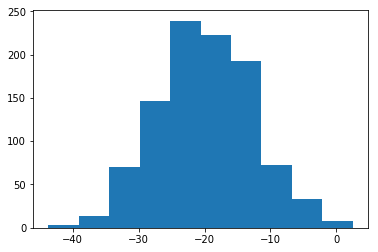

In [18]:
# df['sum sample'] = df['sample 1'] + df['sample 2']
plt.hist(sample_sum)

In [19]:
sample_sum.mean()

-19.953638046340135

In [20]:
sample_sum.var()

52.39518654137225

In [32]:
mean = np.sum(sample_sum) / np.size(sample_sum)
variance = sum([(x - mean) ** 2 for x in sample_sum]) / (len(sample_sum))
print('Mean estimate is\t {}\nVariance estimate is\t  {}'.format(mean, variance))

Mean estimate is	 -19.953638046340135
Variance estimate is	  52.39518654137223


### 2. Central Limit Theorem Let $X_i$ be an [iid](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt{n}}\sum X_{i}$ 
#### By taking 1000 draws from $Z_n$, plot its histogram. Check that for small $n$ (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n$ = 30 or 50) it looks much more like a Gaussian. Check also for much bigger $n$: $n$ = 250, to see that at this point, one can really see the bell curve

In [33]:
def getSumXi(n): return sum(np.random.choice((-1,0,1),n))
def getZn(n): return (1/(sqrt(n)) * getSumXi(n))
def getZnArray(n):
    values = []
    for i in range(1000):
        values.append(getZn(n))
    return np.array(values)

(array([  7.,  20., 197., 186.,   0., 388., 122.,  60.,  17.,   3.]),
 array([-2.23606798, -1.78885438, -1.34164079, -0.89442719, -0.4472136 ,
         0.        ,  0.4472136 ,  0.89442719,  1.34164079,  1.78885438,
         2.23606798]),
 <a list of 10 Patch objects>)

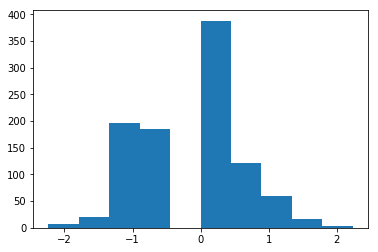

In [34]:
values = getZnArray(5)
plt.hist(values)

(array([  3.,  10.,  34.,  95., 109., 282., 248., 144.,  61.,  14.]),
 array([-2.92118697, -2.40997925, -1.89877153, -1.38756381, -0.87635609,
        -0.36514837,  0.14605935,  0.65726707,  1.16847479,  1.67968251,
         2.19089023]),
 <a list of 10 Patch objects>)

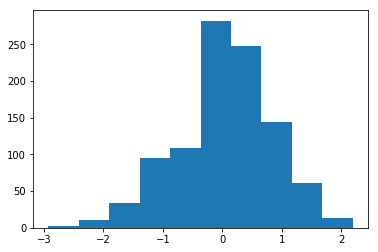

In [35]:
values = getZnArray(30)
plt.hist(values)

(array([  4.,  13.,  46., 141., 243., 229., 196.,  90.,  27.,  11.]),
 array([-2.82842712, -2.29102597, -1.75362482, -1.21622366, -0.67882251,
        -0.14142136,  0.3959798 ,  0.93338095,  1.4707821 ,  2.00818326,
         2.54558441]),
 <a list of 10 Patch objects>)

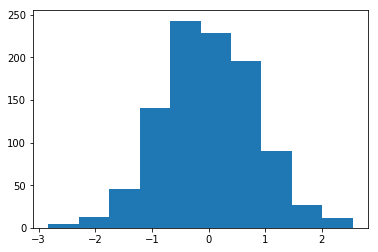

In [36]:
values = getZnArray(50)
plt.hist(values)

(array([  2.,  13.,  39., 146., 208., 231., 198., 117.,  34.,  12.]),
 array([-2.84604989, -2.3211118 , -1.79617371, -1.27123562, -0.74629753,
        -0.22135944,  0.30357866,  0.82851675,  1.35345484,  1.87839293,
         2.40333102]),
 <a list of 10 Patch objects>)

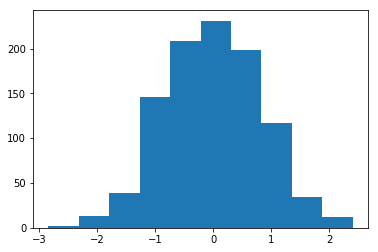

In [37]:
values = getZnArray(250)
plt.hist(values)

### 3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition,multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [12]:
mu = 0
sigma = 5
sample = np.random.normal(mu, sigma, 25000)

In [13]:
mean = np.sum(sample) / np.size(sample)
mean

-0.04699177152573539

In [14]:
std_deviation = sqrt(sum([(i - mean) ** 2 for i in sample]) / (len(sample)-1))
print(std_deviation)

5.0174016362641645


### 4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution $$\left(\begin{array}{cc} 
X_i\\ Y_i \end{array}\right) 
\sim N \left(\begin{array}{cc} 
\left(\begin{array}{cc} -5\\5 \end{array}\right)
\left(\begin{array}{cc}20 & .8\\ .8 & 30\end{array}\right)
\end{array}\right)$$
#### Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation). (Recall: this notation is a compact way of specifying the distribution of two Gaussian random variables that are correlated. Specifically, the notation indicates that X has mean −5 and variance 20, Y has mean 5 and variance 30, and the covariance of X and Y is 0.8, i.e., $E[(X + 5)(Y − 5)] = 0.8$.)

In [41]:
mean = [-5,5]
cov = [[20,.8],[.8,30]]
matrix = np.random.multivariate_normal(mean, cov, 10000)

n = len(matrix)

df = pd.DataFrame(matrix, columns = ["x","y"])
## Determine actual values of means, variances and covariances
df.x.mean(), df.x.var(), df.y.mean(), df.y.var(), df.cov()
matrix

array([[-10.61556407,   1.58039114],
       [  3.43113742,   7.89831385],
       [ -5.75018431,  -4.8483695 ],
       ...,
       [ -1.35136839,  -0.01162919],
       [  0.90370776,   0.46500687],
       [ -4.48325116,  11.35741867]])

In [39]:
meanMatrix = [x/n for x in np.sum(matrix, axis=0)]
meanMatrix

[-5.040197024549967, 5.0348060012612414]

In [40]:
def getCovMatrix(mtx, avmtx):
    variances = []
    for i in range(len(mtx)):
        variance = [(mtx[i][0]-avmtx[0])**2, ##Variance of X
                    (mtx[i][0]-avmtx[0])*(mtx[i][1]-avmtx[1]), ##Covariance of x and y
                    (mtx[i][1]-avmtx[1])*(mtx[i][0]-avmtx[0]), ##Covariance of y and x
                    (mtx[i][1]-avmtx[1])**2 ##Variance of Y
                   ]
        variances.append(variance)
    varianceSummation = np.sum(variances, axis=0)
    xx,yx,xy,yy = 0,1,2,3
    newN = n-1
    covMtx = [
                [varianceSummation[xx]/(newN), varianceSummation[yx]/(newN)],
                [varianceSummation[xy]/(newN), varianceSummation[yy]/(newN)]
             ]
    return covMtx
getCovMatrix(matrix,meanMatrix)

[[20.19195881576703, 0.6157500591838821],
 [0.6157500591838821, 28.994584098809934]]

### 5. Download from Canvas/Files the dataset PatientData.csv.
#### Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
(a) How many patients and how many features are there?

(b) What is the meaning of the first 4 features? See if you can understand what they mean.

(c) Are there missing values? Replace them with the average of the corresponding feature column

(d) How could you test which features strongly influence the patient condition and which do not?

#### List what you think are the three most important features